<a href="https://colab.research.google.com/github/hadiwyne/health-insurance/blob/main/Predicting_Insurance_Cost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h3>The first step is importing the necessary libraries. Since we will begin our analysis with using Linear Regression, we will import that Linear Regression's library from sklearn</h3>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

<h3>Now, let's have a little peak at our dataset to see what we're dealing with</h3>

In [ ]:
insurance = pd.read_csv('insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<h3>Interestingly, there are no NULL values within our dataset. This means that this is a very good dataset</h3>

In [ ]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<h3>The mean and median of age and BMI columns are pretty similar. But the charges column has a major discrepancy between mean and median. This is a topic worth investigating.</h3>

In [ ]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<h3>As we can see here, it is not normally distributed. We can fix this by using the log squared function</h3>

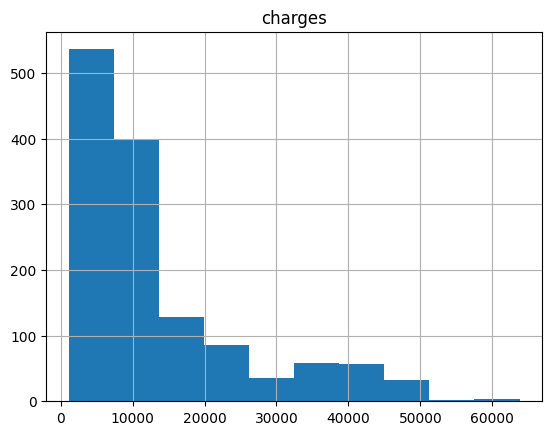

In [ ]:
insurance.hist('charges')
plt.show()

<h3>Now, we can see that the charges column is normally distributed</h3>

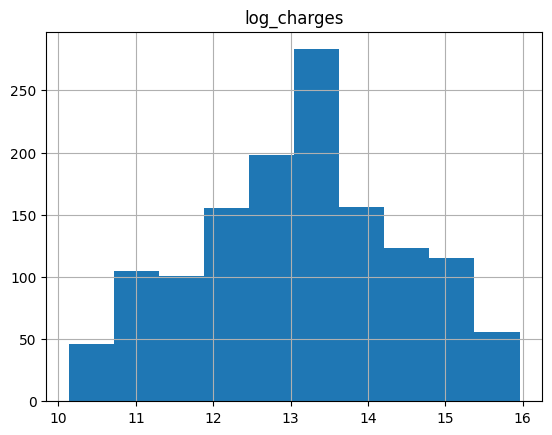

In [ ]:

insurance["log_charges"] = np.log2(insurance["charges"])

insurance.hist("log_charges")

plt.show()

In [ ]:
correlations = insurance.select_dtypes(include='number').corr()
correlations

,age,bmi,children,charges,log_charges
age,1.000000,0.109272,0.042469,0.299008,0.527834
bmi,0.109272,1.000000,0.012759,0.198341,0.132669
children,0.042469,0.012759,1.000000,0.067998,0.161336
charges,0.299008,0.198341,0.067998,1.000000,0.892964
log_charges,0.527834,0.132669,0.161336,0.892964,1.000000


<h3>Observation 1:</h3>
<ul>The variable "charges" shows a correlation of approximately 0.89 with "log_charges".</ul>
<ul>This high correlation suggests that even after applying a logarithmic transformation (done to reduce skewness) the relationship between the original and transformed charges remains almost linear.</ul>
<h3>Observation 2:</h3>
<ul>The correlation between "bmi" and "children" is near zero (about 0.01276), indicating there is virtually no linear relationship between these variables.</ul>

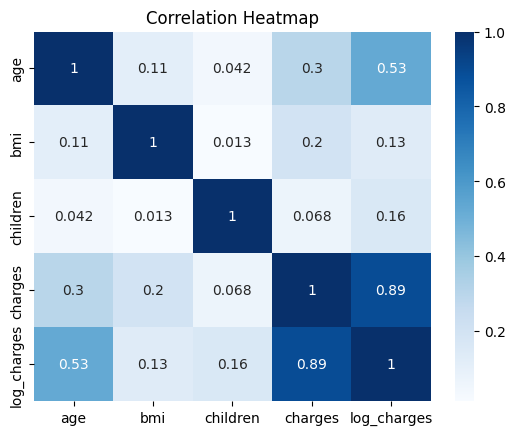

In [ ]:
correlations = insurance.select_dtypes(include='number').corr()


sns.heatmap(correlations, annot=True, cmap='Blues')


plt.title("Correlation Heatmap")
plt.show()


<h3>The pair plot visualizes the relationships between the key variables: age, bmi, children, charges, and log_charges.</h3>

<h3>1. Age vs. Charges:</h3>
<ul>There is a positive trend indicating that older individuals tend to have higher charges.</ul>
<ul>This may highlight age-related increases in health risks or medical costs.</ul>
<h3>2. BMI vs. Charges:</h3>
<ul>A visible positive correlation means that individuals with a higher BMI incur higher charges.</ul>
<ul>This could reflect the association between higher BMI and potential health issues.</ul>
<h3>3. Children vs. Charges:</h3>
<ul>The relationship appears scattered with no clear linear pattern.</ul>
<ul>The number of children does not seem to significantly impact charges on its own.</ul>
<h3>4. Charges vs. Log_Charges:</h3>
<ul>There is a strong linear relationship, as expected since log_charges is a transformation of charges.</ul>
<ul>This confirms that the logarithmic transformation, likely applied to reduce skewness, maintains the underlying structure of the data.</ul>
<h3>5. Age vs. BMI:</h3>
<ul>The scatter plot shows a random distribution with no discernible pattern.</ul>
<ul>Age does not appear to have a strong association with BMI in this dataset.</ul>
<h3>6. Age vs. Children and BMI vs. Children:</h3>
<ul>Both plots show no clear patterns, meaning that the number of children is relatively independent of age or BMI.</ul>
<h3>7. Diagonal Histograms:</h3>
         <li>Age has a relatively uniform spread.</li>
         <li>The 'children' distribution is heavily skewed towards fewer children (mostly 0-2).</li>

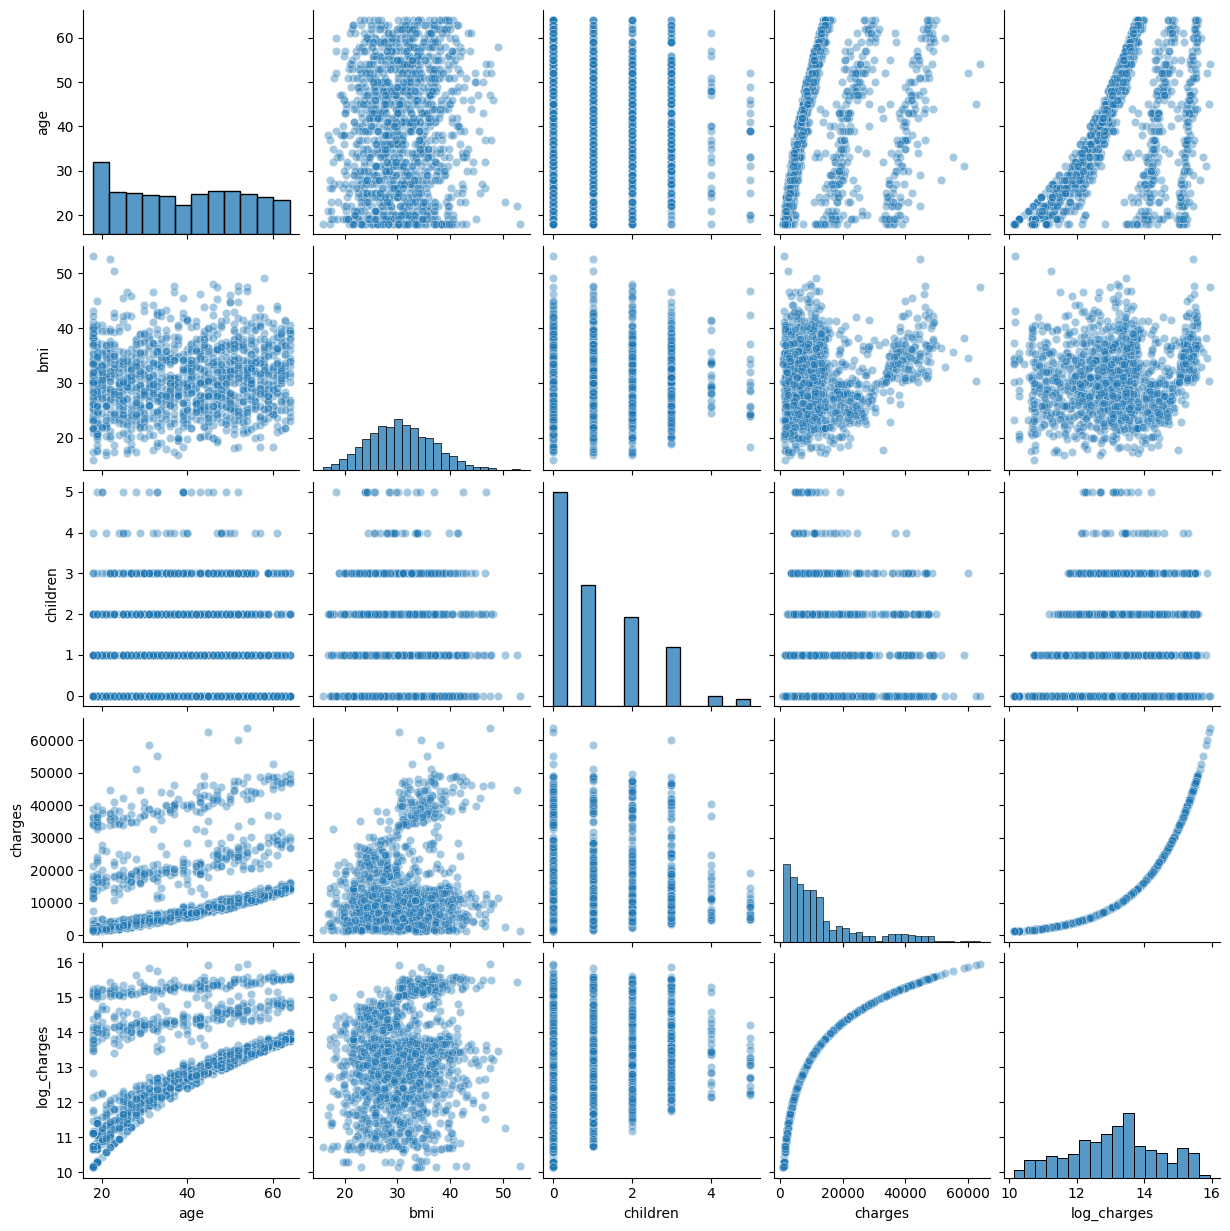

In [ ]:
insurance_numeric = insurance[['age', 'bmi', 'children', 'charges', 'log_charges']]
sns.pairplot(insurance_numeric, kind='scatter', plot_kws={'alpha': 0.4})
plt.show()

### 1. Median Comparison:
- The median log-transformed charges are approximately the same (~13) for both sexes.
- This suggests that, on average, male and female individuals have similar healthcare costs in this dataset.

### 2. Interquartile Range (IQR):
- The IQR for females is slightly wider than for males.
- This suggests that there is more variability in log-transformed charges among female individuals.

### 3. Potential Outliers:
- The boxplot shows several outliers in both male and female groups.
- These could represent extreme medical expenses, which may need further investigation.

### 4. Overall Range:
- The minimum and maximum log-transformed charge values are quite similar across both sexes.
- While individual costs vary, the overall range of charges remains comparable.

<Axes: title={'center': 'log_charges'}, xlabel='sex'>

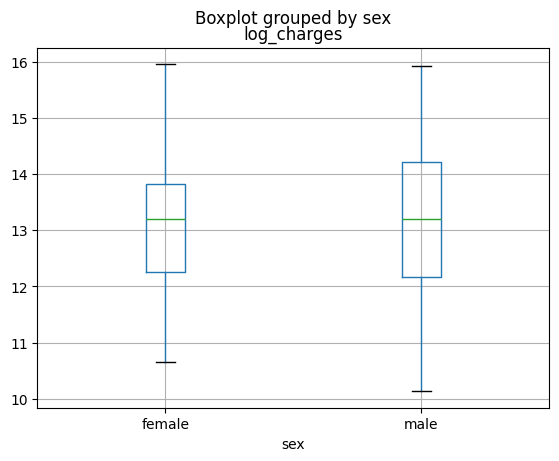

In [ ]:
insurance.boxplot(column=["log_charges"], by="sex")

### 1. **Median Comparison:**
- The median log charge for **non-smokers** is around 12.5.
- The median log charge for **smokers** is notably higher at around 14.5.
- This suggests that smokers tend to incur **higher medical expenses** compared to non-smokers.

### 2. **Interquartile Range (IQR):**
- The IQR for non-smokers ranges from approximately **11.5 to 13.5**.
- The IQR for smokers spans from **13.5 to 15.5**, indicating a shift towards higher costs.
- This shows that **smokers not only have higher median charges but also experience more variability in costs**.

### 3. **Potential Outliers:**
- Both groups contain **outliers**, which show individuals with exceptionally high medical expenses.
- This is more pronounced in the smokers' category, which means that smoking is associated with **extreme healthcare costs in some cases**.

### 4. **Overall Range:**
- The **non-smoker group** has charges mostly between **10 and 15**.
- The **smoker group** has charges mostly between **12 and 16**.
- This visualization clearly shows that **smoking is associated with significantly higher insurance costs**.

## Implications:
- The **higher medical costs for smokers** suggest a direct financial impact, possibly due to increased health risks.

<Axes: title={'center': 'log_charges'}, xlabel='smoker'>

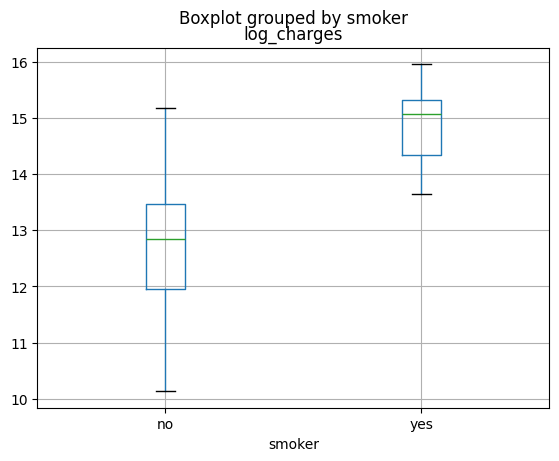

In [ ]:
insurance.boxplot(column=["log_charges"], by="smoker")

<h3>We don't see much worth investigating in this particular boxplot.</h3>

<Axes: title={'center': 'log_charges'}, xlabel='region'>

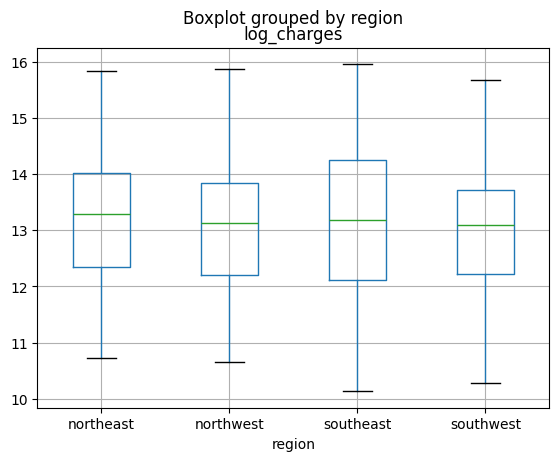

In [ ]:
insurance.boxplot(column=["log_charges"], by="region")

<p>Now that we've exhausted all of our variables worth investigating and have performed the EDA, let's move on towards the actual part of fitting the model onto the dataset. But first, we would have to split our dataset into training and testing dataset.</p>
    
<p>Because we've noticed that being a smoker means incurring higher costs, let's focus on individuals who are smokers. We will create a new column titled <b>is_smoker</b> and we will populate that column with individuals who have a <b>yes</b> answer in their <b>smoker</b> column.</p>

In [ ]:
insurance["is_smoker"] = (insurance["smoker"] == "yes")
X = insurance[["age", "bmi", "is_smoker"]]
y = insurance["log_charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [ ]:
insurance_model = LinearRegression()
insurance_model.fit(X_train, y_train)
insurance_model.coef_

array([0.0508618 , 0.01563733, 2.23214787])

In [ ]:
y_pred = insurance_model.predict(X_train)

In [ ]:
y_pred

array([11.79052705, 12.03861881, 13.41469648, ..., 13.54359685,
       15.05831411, 13.46489784], shape=(1003,))

### Now, let's look at the Mean Squared Error, and see how well our model performs via R2 score

In [ ]:
train_mse = mean_squared_error(y_train, y_pred)
train_mse

0.447919196329921

<p>In this step, we've reverted our dataset back from the original log squared function that we applied</p>

In [ ]:
train_mse_orig_scale = np.exp2(mean_squared_error(y_train,y_pred))
train_mse_orig_scale

np.float64(1.3640714326864813)

In [ ]:
train_r2 = r2_score(y_train, y_pred)
train_r2

0.743333600772825

- **Overall Relationship:**
  - The majority of points are clustered around an implicit diagonal line. This means that our predictions are generally close to the actual values.
  
- **Interpreting Deviations:**
  - **Points Above the Diagonal:** These are the cases where the actual log charges are higher than predicted, which means points where the model underestimated.
  - **Points Below the Diagonal:** These are overestimations, where the model predicts higher values than what is observed.
  
- **Assessing Model Accuracy:**
  - The tight clustering of most points around the diagonal means reasonable model performance. But the scatter (or spread) of points also highlights the residual error in our predictions.
  - Further analysis on the residual distribution is needed

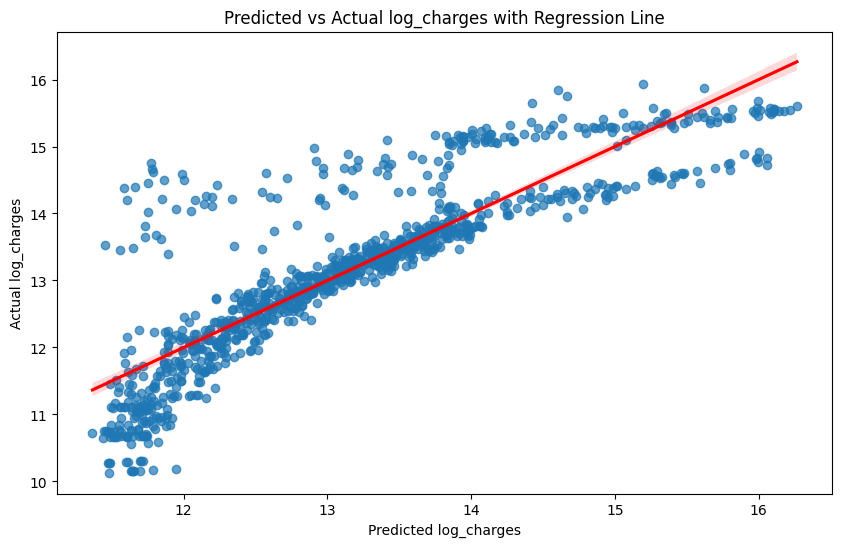

In [ ]:
plot_df = pd.DataFrame({
    'predictions': y_pred,
    'actual': y_train,
    'is_smoke': X_train['is_smoker'],
    'age': X_train['age'],
    'bmi': X_train['bmi'],
    'residuals': y_train - y_pred,
})

plt.figure(figsize=(10, 6))
sns.regplot(x='predictions', y='actual',
            data=plot_df, scatter_kws={'alpha': 0.7}, line_kws={'color': 'red'})

plt.xlabel('Predicted log_charges')
plt.ylabel('Actual log_charges')
plt.title('Predicted vs Actual log_charges with Regression Line')
plt.show()


## Key Observations:
1. **Residual Distribution:**
   - The plot shows that residuals are spread around the prediction values. But if our model was working well, the residuals should've been randomly distributed with no systematic pattern.
  
2. **Funnel Shape (Heteroscedasticity):**
   - A noticeable funnel shape is visible in the plot. This shows that the variance of the residuals is not constant across the range of predictions. This is known as heteroscedasticity.
   - Heteroscedasticity suggests that the model's prediction errors vary at different levels of predicted charges.

## Implications:
- **Model Diagnostics:**  
  The funnel pattern in the residuals suggests that the model might be underestimating or overestimating variability in certain regions.

<Axes: xlabel='predictions', ylabel='residuals'>

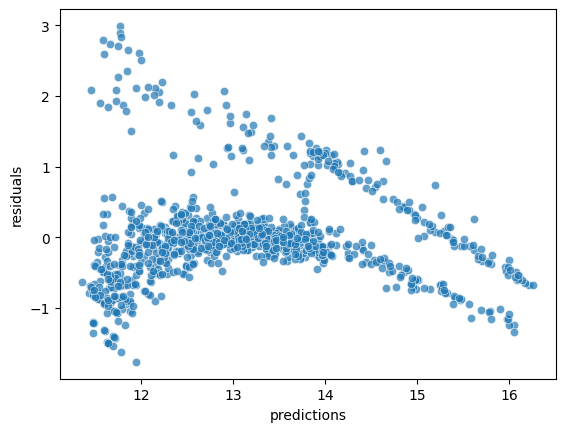

In [ ]:
sns.scatterplot(x='predictions', y='residuals', data=plot_df, alpha=0.7)

### Now, let's test our model on the testing data

In [ ]:
test_pred = insurance_model.predict(X_test)

mean_squared_error(y_test, test_pred)

0.4529281560931769

In [ ]:
np.exp2(mean_squared_error(y_test, test_pred))

np.float64(1.3688156465634753)

### Since we've seen that the smoking category has a huge impact on our dataset, let's focus our Linear Regression model on the smokers category

In [ ]:
smokers_df = insurance[insurance["is_smoker"] == True]

In [ ]:
X = smokers_df[["age", "bmi"]]
y = smokers_df["log_charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [ ]:
smoker_model = LinearRegression()
smoker_model.fit(X_train, y_train)
smoker_model.coef_

array([0.01282851, 0.07098738])

### Now, let's apply the model and see what we get

In [ ]:
y_pred = smoker_model.predict(X_train)

### NOW we are seeing a much reduced mean squared error, which implies that this is a much better column to focus on

In [ ]:
train_mse = mean_squared_error(y_train, y_pred)
train_mse

0.07046354357369702

In [ ]:
train_mse_orig_scale = np.exp2(mean_squared_error(y_train,y_pred))
train_mse_orig_scale

np.float64(1.0500540158998275)

### Even the R2 score has significantly improved. Let's move on towards visualizations

In [ ]:
train_r2 = r2_score(y_train, y_pred)
train_r2

0.7661650418251629

### Now, most data points are clustering around the ideal diagonal line where predictions equal actual values. This means that, generally, our model is now capturing the trend in the data accurately.

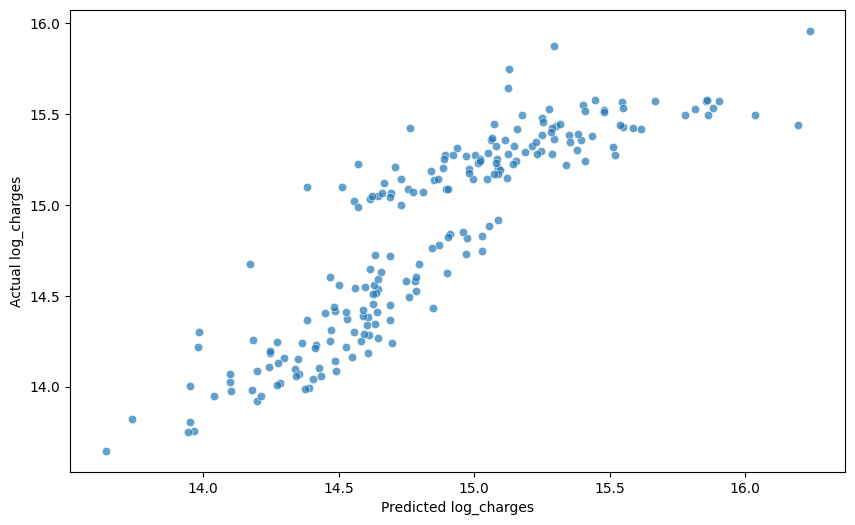

In [ ]:
plot_df = pd.DataFrame({
    'predictions': y_pred,
    'actual': y_train,
    'age': X_train['age'],
    'bmi': X_train['bmi'],
    'residuals': y_train - y_pred,
})

plt.figure(figsize=(10, 6))
sns.scatterplot(x='predictions', y='actual',
                data=plot_df, alpha=0.7)

plt.xlabel('Predicted log_charges')
plt.ylabel('Actual log_charges')

plt.show()

### We also no longer find heteroscedasticity in the residual plot

<Axes: xlabel='predictions', ylabel='residuals'>

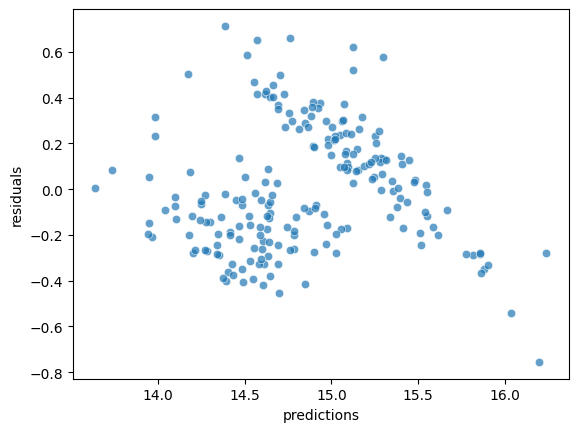

In [ ]:
sns.scatterplot(x='predictions', y='residuals', data=plot_df, alpha=0.7)

### And the mean squared error is significantly lower. This suggests that focusing on the smokers category produces better results in our model

In [ ]:
test_pred = smoker_model.predict(X_test)

mean_squared_error(y_test, test_pred)

0.09416078156173806